In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud  # 사이킷런 데이타셋

In [7]:
linnerud = load_linnerud()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names), 
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [10]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Situps', 'Jumps']]
y_data=df.loc[:, 'Chins']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 2) (16,)
(4, 2) (4,)


Ridge

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.3361599650070528


In [14]:
print(ridge.score(test_scaled, y_test))

0.48040471347762626


In [15]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [16]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

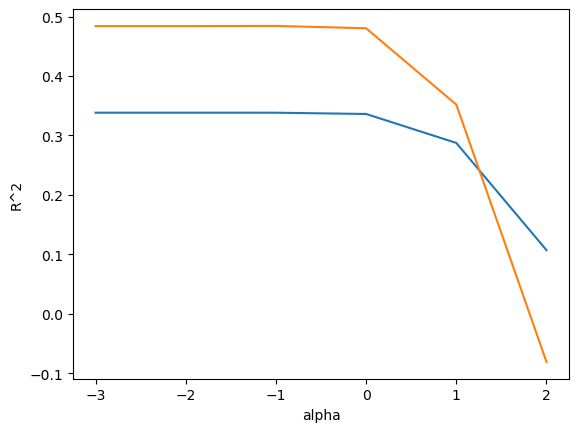

In [17]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [18]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)

print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.3382997778608693
0.4843437995602963


Lasso

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.28794707472593406


In [20]:
print(lasso.score(test_scaled, y_test))

0.2614365325616952


In [21]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

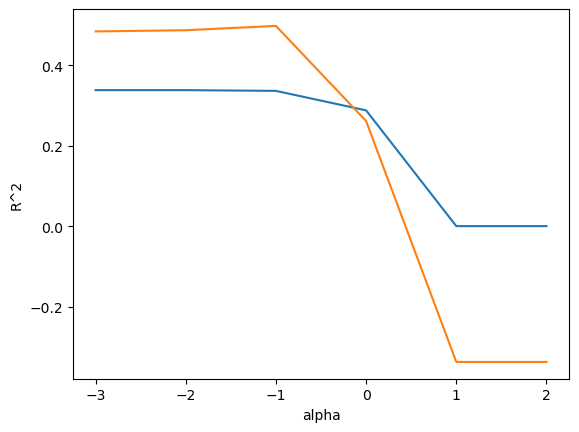

In [22]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [23]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, y_train)

print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.33782996894409933


In [24]:
print(np.sum(lasso.coef_ == 0))

2
